In [21]:
import os
import pandas as pd
import pycaret.classification as clf

import utils as my

## Monitoring & Check `history.csv`

### Training results

In [27]:
df_history = pd.read_csv("./models/history.csv")
df_history = df_history.loc[df_history["LogLoss"] < 0.1, :]
my.show_history(df_history, mode="Train", sort_by=['Prec.', 'AUC'])

,1,5,7,13,17,19,21,23
Model,base,base,base,base,base,base,base,base
Accuracy,1.000000,1.000000,1.000000,1.000000,1.000000,0.999100,1.000000,1.000000
AUC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Recall,1.000000,1.000000,1.000000,1.000000,1.000000,0.994400,1.000000,1.000000
Prec.,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
F1,1.000000,1.000000,1.000000,1.000000,1.000000,0.997200,1.000000,1.000000
LogLoss,0.000000,0.067100,0.070900,0.078900,0.080100,0.079400,0.078400,0.078400
Tact,0:00:43,0:00:55,0:00:40,0:00:57,0:01:00,0:00:57,0:00:55,0:00:55
imputation_type,simple,iterative,simple,iterative,iterative,iterative,iterative,iterative
fix_imbalance,False,True,False,True,True,True,True,True


### Test restuls

In [25]:
df_history = pd.read_csv("./models/history.csv")
df_history = df_history.loc[(df_history["LogLoss"] < 0.4) & (df_history["AUC"] > 0.8), :]
my.show_history(df_history, mode="Test", sort_by=['Prec.', 'AUC'])

,7,5,15
Model,base,base,base
Accuracy,0.861000,0.866500,0.871900
AUC,0.800500,0.805000,0.814500
Recall,0.152500,0.254200,0.372900
Prec.,0.900000,0.750000,0.687500
F1,0.260900,0.379700,0.483500
LogLoss,0.354300,0.351900,0.346700
Tact,0:00:40,0:00:55,0:00:51
imputation_type,simple,iterative,iterative
fix_imbalance,False,True,True


## Metrics

In [28]:
dataset_path = "./WA_Fn-UseC_-HR-Employee-Attrition.csv"
target_name = "Attrition"
train_size = 0.75
seed = 111

train, test = my.get_data(dataset_path, train_size, seed, target_name=target_name)

Train Data: (1103, 35)
Test  Data: (367, 35) 



### Default model (all default parameters)

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._stacking.StackingClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall  Prec.      F1  LogLoss Tact
0          0.9248  0.9216   0.618   0.88  0.7261   0.2312     


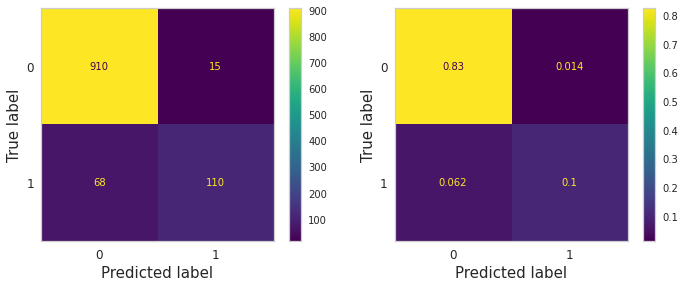

>> Test scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.8638  0.7787  0.3051  0.6667  0.4186   0.3753     


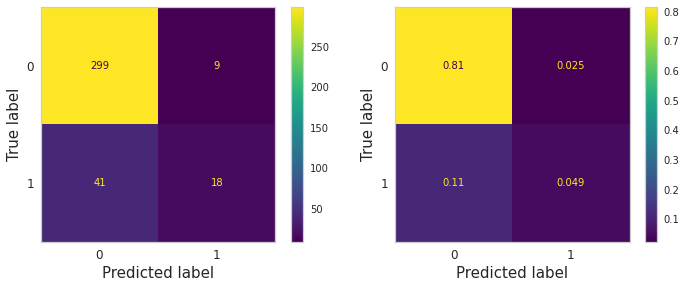

In [29]:
## Default model
model_name = "default__train__Accuracy-0.9248_AUC-0.9216__test__Accuracy-0.8638_AUC-0.7787__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Baseline model

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
>> Train scores:
   Model  Accuracy  AUC  Recall  Prec.   F1  LogLoss Tact
0             1.0  1.0     1.0    1.0  1.0      0.0     


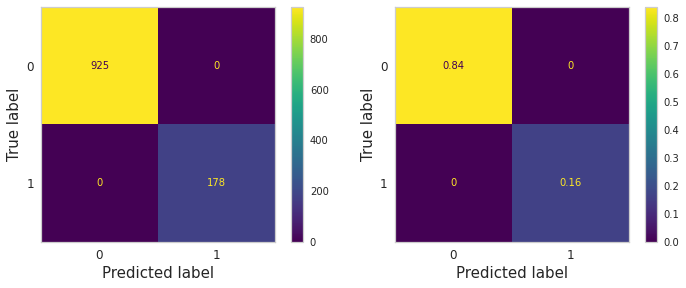

>> Test scores:
   Model  Accuracy     AUC  Recall  Prec.      F1  LogLoss Tact
0          0.8556  0.7893  0.1356    0.8  0.2319   0.3588     


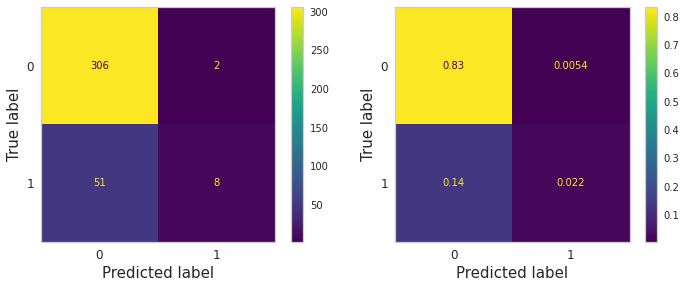

In [30]:
model_name = "base__train__Accuracy-1.0000_AUC-1.0000__test__Accuracy-0.8556_AUC-0.7893__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Tuned models

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
>> Train scores:
   Model  Accuracy  AUC  Recall  Prec.   F1  LogLoss Tact
0             1.0  1.0     1.0    1.0  1.0      0.0     


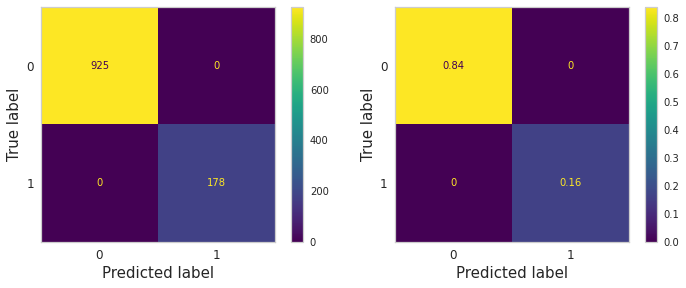

>> Test scores:
   Model  Accuracy     AUC  Recall  Prec.      F1  LogLoss Tact
0          0.8556  0.7893  0.1356    0.8  0.2319   0.3588     


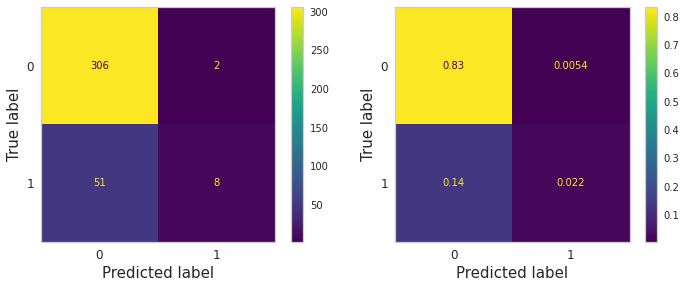

In [31]:
## Baseline model
model_name = "base__train__Accuracy-1.0000_AUC-1.0000__test__Accuracy-0.8556_AUC-0.7893__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])